<a href="https://colab.research.google.com/github/Appajisdsrao/Classical-Computer-Vision-Algorithms-for-Lane-Detection/blob/main/computervision_unit_3_and_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving pexels-pixabay-56832.jpg to pexels-pixabay-56832.jpg


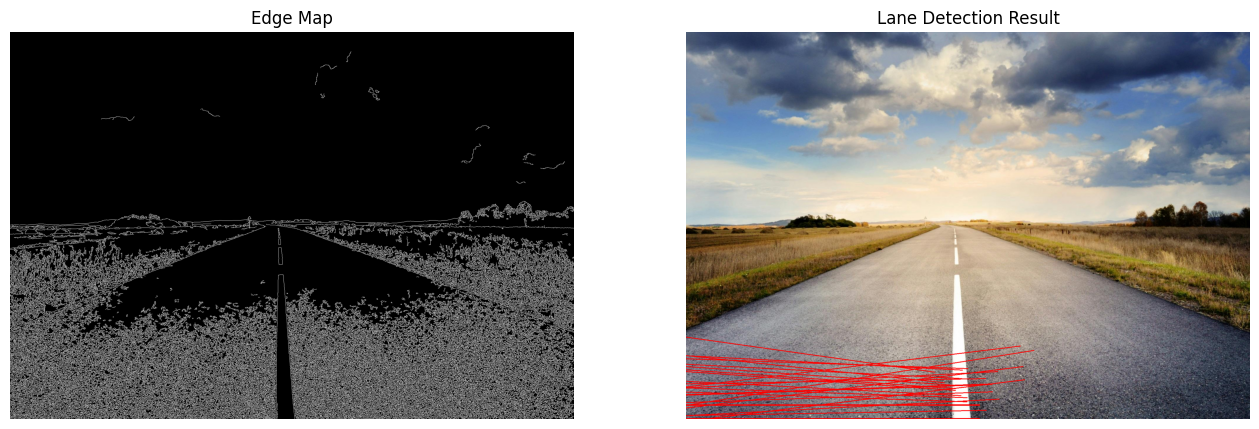

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Use your actual uploaded image filename below
img = cv2.imread('pexels-pixabay-56832.jpg')  # Replace with your filename
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 120)
img_lines = img.copy()
if lines is not None:
    for line in lines[:25]:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img_lines, (x1, y1), (x2, y2), (0,0,255), 2)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(edges, cmap="gray")
plt.title("Edge Map")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
plt.title("Lane Detection Result")
plt.axis('off')
plt.show()


In [11]:
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("dataclusterlabs/lane-detection-road-line-detection-image-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'lane-detection-road-line-detection-image-dataset' dataset.
Path to dataset files: /kaggle/input/lane-detection-road-line-detection-image-dataset


In [14]:
# Define the path to your deepest image folder first:
image_dir = '/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images'

# Now find your images
from glob import glob
img_files = glob(f"{image_dir}/*.png") + glob(f"{image_dir}/*.jpg") + glob(f"{image_dir}/*.jpeg")
print(img_files[:5])


['/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images/dc_underpass_image_000563_m5dfEDLyMC.png', '/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images/dc_underpass_image_000534_SlMRuvkUbC.png', '/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images/dc_vehicle_BMZV88NRNT3UZQQ1.jpg', '/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images/dc_bus_image_000854_3fULAgVA6t.jpg', '/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images/dc_auto_004206_vwVEPMH1.jpg']


In [15]:
import os
print(os.listdir(image_dir))


['dc_vehicle_BMZV88NRNT3UZQQ1.jpg', 'dc_bus_image_000854_3fULAgVA6t.jpg', 'dc_auto_004206_vwVEPMH1.jpg', 'dc_vehicle_Y9L2WV7Z6ZS3YOUW.jpg', 'dc_auto_001955_v7vnp5E9.jpg', 'dc_bus_image_000242_QlEjHhr8RD.jpg', 'dc_vehicle_WE14D6T2N8U3ZDZF.jpg', 'dc_bus_image_001160_QpzvnDJ1bz.jpg', 'dc_auto_000179_MdYqzu93.jpg', 'dc_auto_001865_tRgbasxm.jpg', 'dc_bus_image_001497_QXUbFYRdf0.jpg', 'dc_truck_image_002462_spSOc6PR.jpg', 'dc_auto_image_001827_yOJTWERkvJ.jpg', 'dc_auto_image_000156_modwC7i7z3.jpg', 'dc_vehicle_WAMI639F3REVNE27.jpg', 'dc_auto_001952_UOqgzYLe.jpg', 'dc_roadline_pedestrian_000004_VDjPUfpz.jpg', 'dc_vehicle_L4AUNQTOA2IDNTPO.jpg', 'dc_auto_image_001363_2aKIdjQxzD.jpg', 'dc_bus_image_000435_aGBzNtn4XS.jpg', 'dc_bus_image_000683_R6UGQdmkkn.jpg', 'dc_vehicle_979RN3R28PYTF3IC.jpg', 'dc_vehicle_GWL9GSAFR7GZZ2O7.jpg', 'dc_auto_001867_G9fFComp.jpg', 'dc_bus_image_000820_1RaOmuHKDz.jpg', 'dc_vehicle_MFYL2QKMNVQ8QAT9.jpg', 'dc_vehicle_YCDB82ARR8Q8NHL7.jpg', 'dc_vehicle_KL52OGRB6WH3X2UR.jp

In [17]:
import os
# Assign the correct path to the image folder variable:
img_folder = '/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images'

print(os.listdir(img_folder))


['dc_vehicle_BMZV88NRNT3UZQQ1.jpg', 'dc_bus_image_000854_3fULAgVA6t.jpg', 'dc_auto_004206_vwVEPMH1.jpg', 'dc_vehicle_Y9L2WV7Z6ZS3YOUW.jpg', 'dc_auto_001955_v7vnp5E9.jpg', 'dc_bus_image_000242_QlEjHhr8RD.jpg', 'dc_vehicle_WE14D6T2N8U3ZDZF.jpg', 'dc_bus_image_001160_QpzvnDJ1bz.jpg', 'dc_auto_000179_MdYqzu93.jpg', 'dc_auto_001865_tRgbasxm.jpg', 'dc_bus_image_001497_QXUbFYRdf0.jpg', 'dc_truck_image_002462_spSOc6PR.jpg', 'dc_auto_image_001827_yOJTWERkvJ.jpg', 'dc_auto_image_000156_modwC7i7z3.jpg', 'dc_vehicle_WAMI639F3REVNE27.jpg', 'dc_auto_001952_UOqgzYLe.jpg', 'dc_roadline_pedestrian_000004_VDjPUfpz.jpg', 'dc_vehicle_L4AUNQTOA2IDNTPO.jpg', 'dc_auto_image_001363_2aKIdjQxzD.jpg', 'dc_bus_image_000435_aGBzNtn4XS.jpg', 'dc_bus_image_000683_R6UGQdmkkn.jpg', 'dc_vehicle_979RN3R28PYTF3IC.jpg', 'dc_vehicle_GWL9GSAFR7GZZ2O7.jpg', 'dc_auto_001867_G9fFComp.jpg', 'dc_bus_image_000820_1RaOmuHKDz.jpg', 'dc_vehicle_MFYL2QKMNVQ8QAT9.jpg', 'dc_vehicle_YCDB82ARR8Q8NHL7.jpg', 'dc_vehicle_KL52OGRB6WH3X2UR.jp

In [19]:
from glob import glob
img_files = glob(f"{img_folder}/*.png") + glob(f"{img_folder}/*.jpg") + glob(f"{img_folder}/*.jpeg")
print(img_files[:5])  # Preview


['/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images/dc_underpass_image_000563_m5dfEDLyMC.png', '/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images/dc_underpass_image_000534_SlMRuvkUbC.png', '/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images/dc_vehicle_BMZV88NRNT3UZQQ1.jpg', '/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images/dc_bus_image_000854_3fULAgVA6t.jpg', '/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images/dc_auto_004206_vwVEPMH1.jpg']


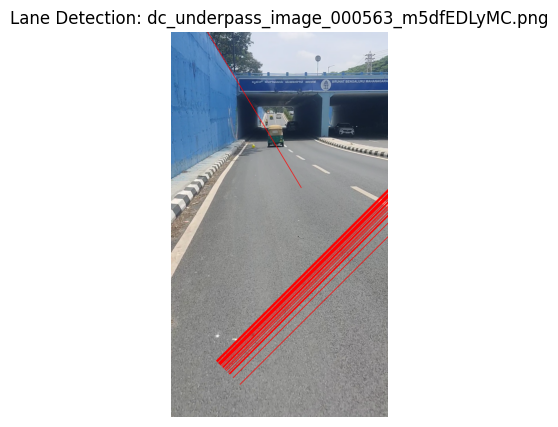

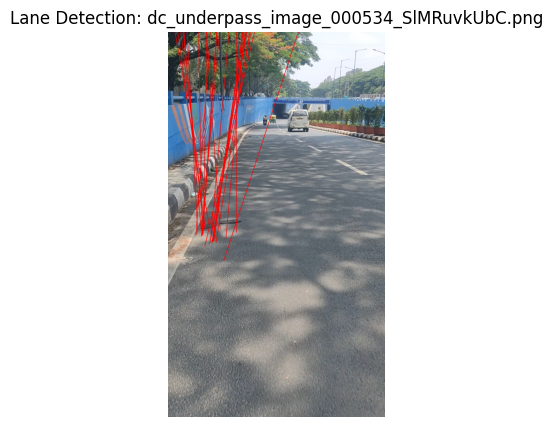

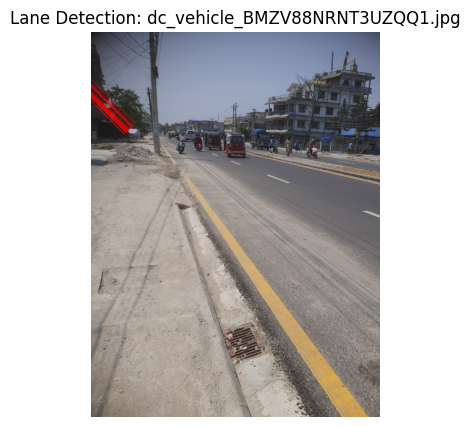

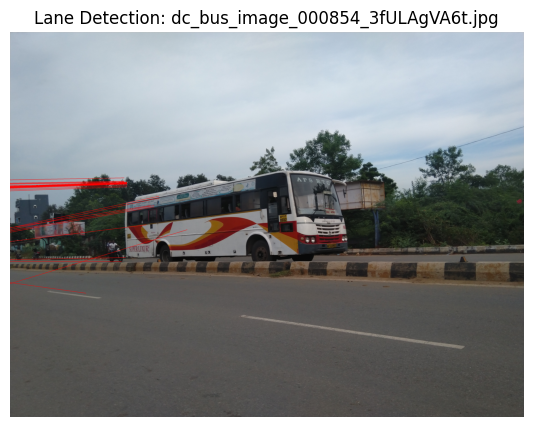

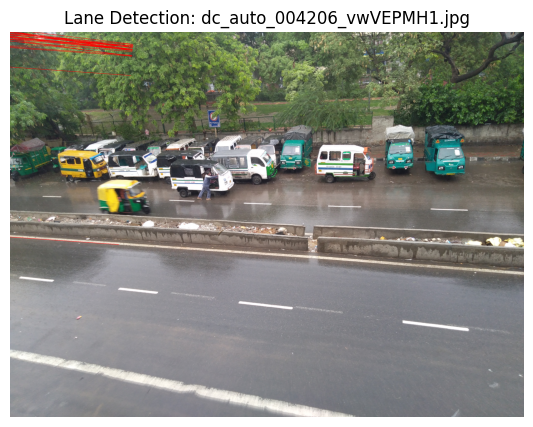

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os

deep_img_folder = '/root/.cache/kagglehub/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset/versions/1/road_line_images/road_line_images'
img_files = glob(f"{deep_img_folder}/*.png") + glob(f"{deep_img_folder}/*.jpg") + glob(f"{deep_img_folder}/*.jpeg")

for img_path in img_files[:5]:  # Run for first 5 images
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi/180, 120)
    img_lines = img.copy()
    if lines is not None:
        for line in lines[:25]:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img_lines, (x1, y1), (x2, y2), (0,0,255), 2)
    plt.figure(figsize=(12,5))
    plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
    plt.title(f"Lane Detection: {os.path.basename(img_path)}")
    plt.axis('off')
    plt.show()


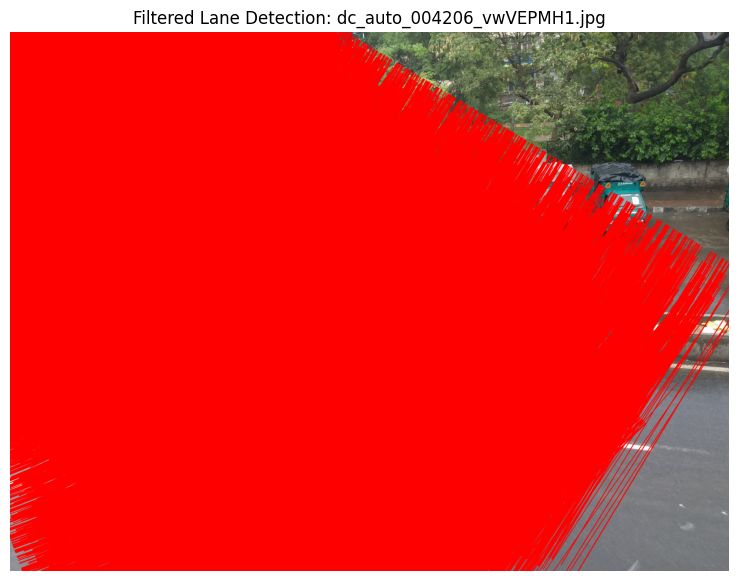

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 120)
img_lines = img.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        # Only draw lines with theta in the "lane zone" (not close to vertical)
        # Lane lines often have angles between 30deg - 70deg or 110deg - 150deg
        deg = np.degrees(theta)
        if (30 < deg < 70) or (110 < deg < 150):
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img_lines, (x1, y1), (x2, y2), (0,0,255), 3)
plt.figure(figsize=(12,7))
plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
plt.title(f"Filtered Lane Detection: {os.path.basename(img_path)}")
plt.axis('off')
plt.show()


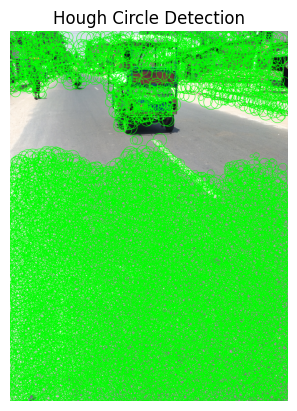

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                          param1=50, param2=30, minRadius=10, maxRadius=80)

output = img.copy()
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Hough Circle Detection")
plt.axis('off')
plt.show()


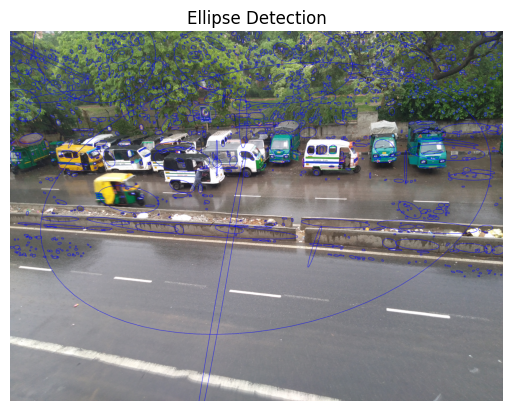

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()
for cnt in contours:
    if len(cnt) >= 5:  # fitEllipse needs at least 5 points
        ellipse = cv2.fitEllipse(cnt)
        (center, axes, angle) = ellipse
        if axes[0] > 0 and axes[1] > 0 and axes[0] > 10 and axes[1] > 10:  # Only draw sensible ellipses
            cv2.ellipse(output, ellipse, (255,0,0), 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Ellipse Detection")
plt.axis('off')
plt.show()


In [24]:
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/lane-detection-road-line-detection-image-dataset


In [25]:
import os
print(os.listdir(path))


['road_line_annotation', 'road_line_images']


In [27]:
from glob import glob
img_files = glob(f"{img_folder}/*.png") + glob(f"{img_folder}/*.jpg") + glob(f"{img_folder}/*.jpeg")
print(img_files[:5])  # Preview first 5 images


[]
